# Supplementary Figures
## Imports

In [17]:
import pandas as pd
import StudyI_Pentatonic_vs_Chromatic.paths as StudyI_paths
from Shared_Scripts.plotting_functions import correlation
import StudyII_All_5_note_Sets.paths as StudyII_paths
import Study_Likert.paths as Study_likert_paths
import seaborn as sns
studyI_GL = pd.read_pickle(
    StudyI_paths.processed_dir + StudyI_paths.post_exclusion_data_pickle_filename)  # Study I: Post-exclusion group-level data

# Load Data
studyII_GL = pd.read_pickle(
    StudyII_paths.processed_dir + StudyII_paths.post_exclusion_data_pickle_filename)  # Study II: Post-exclusion group-level data

study_likert = pd.read_csv(Study_likert_paths.processed_dir + 'set_level_results.csv')  # Study II: Likert ratings

### Score distribution Table (in LaTeX format)

In [3]:
temp = studyII_GL.groupby('set').mean(numeric_only=True).reset_index()[['set','rate shifted - rate swapped (NN)']].sort_values(by='rate shifted - rate swapped (NN)', ascending=True)

# Rename "rate shifted - rate swapped (NN)" into "Bias towards note deviation"
temp = temp.rename(columns={'rate shifted - rate swapped (NN)':'Bias towards note deviation','set':'Set'})

# Print Pandas as table
print(temp.style.to_latex())

\begin{tabular}{llr}
 & Set & Bias towards note deviation \\
7 & 0 1 2 4 8 & -0.007997 \\
2 & 0 1 2 3 6 & 0.032666 \\
3 & 0 1 2 3 7 & 0.055176 \\
59 & 0 3 4 6 8 & 0.062662 \\
65 & 0 4 5 6 7 & 0.067452 \\
11 & 0 1 2 6 7 & 0.083613 \\
61 & 0 3 5 6 7 & 0.083871 \\
5 & 0 1 2 4 6 & 0.084478 \\
52 & 0 2 5 6 8 & 0.087034 \\
43 & 0 2 4 5 6 & 0.087099 \\
9 & 0 1 2 5 7 & 0.089306 \\
1 & 0 1 2 3 5 & 0.096240 \\
51 & 0 2 5 6 7 & 0.096457 \\
25 & 0 1 4 5 8 & 0.098376 \\
12 & 0 1 2 6 8 & 0.099466 \\
45 & 0 2 4 5 8 & 0.105947 \\
32 & 0 2 3 4 5 & 0.111029 \\
18 & 0 1 3 5 7 & 0.115411 \\
36 & 0 2 3 5 6 & 0.116657 \\
17 & 0 1 3 5 6 & 0.121097 \\
41 & 0 2 3 6 9 & 0.123152 \\
30 & 0 1 5 6 7 & 0.125501 \\
28 & 0 1 4 6 9 & 0.127037 \\
14 & 0 1 3 4 6 & 0.131659 \\
27 & 0 1 4 6 8 & 0.131954 \\
24 & 0 1 4 5 7 & 0.132748 \\
13 & 0 1 3 4 5 & 0.133765 \\
6 & 0 1 2 4 7 & 0.136301 \\
34 & 0 2 3 4 7 & 0.137191 \\
47 & 0 2 4 6 8 & 0.138480 \\
29 & 0 1 4 7 8 & 0.138998 \\
22 & 0 1 3 6 9 & 0.139232 \\
10 & 0 1 2 5 8 & 

### Score distribution Table (in pandas format)

In [4]:
temp = studyII_GL.groupby('set').mean(numeric_only=True).reset_index()[['set','rate shifted - rate swapped (NN)']].sort_values(by='rate shifted - rate swapped (NN)', ascending=True)

# Rename "rate shifted - rate swapped (NN)" into "Bias towards note deviation"
temp = temp.rename(columns={'rate shifted - rate swapped (NN)':'Bias towards note deviation','set':'Set'})

# Print Pandas as table
print(temp)

          Set  Bias towards note deviation
7   0 1 2 4 8                    -0.007997
2   0 1 2 3 6                     0.032666
3   0 1 2 3 7                     0.055176
59  0 3 4 6 8                     0.062662
65  0 4 5 6 7                     0.067452
..        ...                          ...
37  0 2 3 5 7                     0.256795
16  0 1 3 4 8                     0.260043
44  0 2 4 5 7                     0.287388
19  0 1 3 5 8                     0.317994
50  0 2 4 7 9                     0.320470

[66 rows x 2 columns]


### Likert Ratings
#### "Some notes felt more important than others." correlation with scores

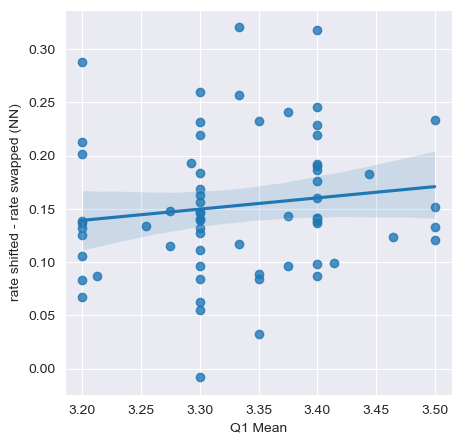

In [8]:
s2 = studyII_GL.groupby('set').mean(numeric_only=True).reset_index()[['set','rate shifted - rate swapped (NN)']]
likert_corr = study_likert.merge(s2, on='set')
correlation(dataset=likert_corr,x='Q1 Mean', y='rate shifted - rate swapped (NN)', type='pearson', normalize=False, show_stats=False, width=5, height=5)

#### "The audio clip was melodic." correlation with scores

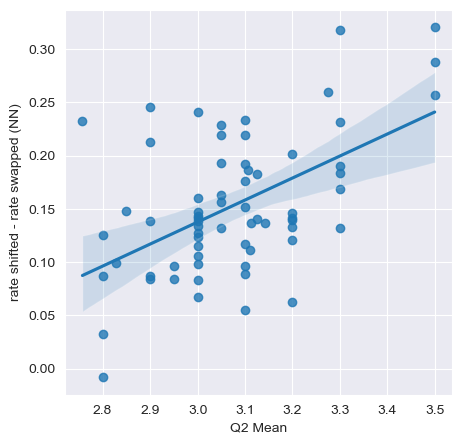

In [9]:
s2 = studyII_GL.groupby('set').mean(numeric_only=True).reset_index()[['set','rate shifted - rate swapped (NN)']]
likert_corr = study_likert.merge(s2, on='set')
correlation(dataset=likert_corr,x='Q2 Mean', y='rate shifted - rate swapped (NN)', type='pearson', normalize=False, show_stats=False, width=5, height=5)

#### "The melody as a whole or parts of it felt familiar." correlation with scores

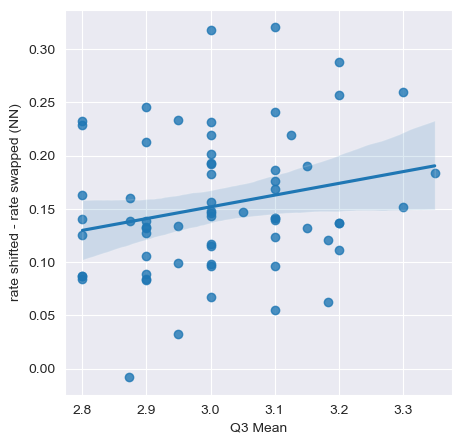

In [10]:
s2 = studyII_GL.groupby('set').mean(numeric_only=True).reset_index()[['set','rate shifted - rate swapped (NN)']]
likert_corr = study_likert.merge(s2, on='set')
correlation(dataset=likert_corr,x='Q3 Mean', y='rate shifted - rate swapped (NN)', type='pearson', normalize=False, show_stats=False, width=5, height=5)

### Study I results  (12-note) for musicians and non-musicians

<Axes: xlabel='set', ylabel='rate'>

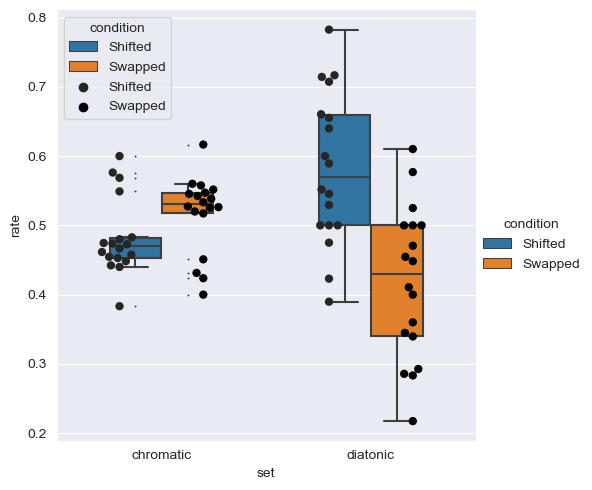

In [22]:
# Only keep rows with length 12 or 16
temp = studyI_GL[studyI_GL['length'] >= 12]

# Only keep people who are not musicians
temp = temp[temp["How many years of formal musical training do you have?"] == "0"]

temp = temp[temp["Do you play any instruments (with or without formal training)?"] == "No"]

temp = temp[['rate_NN_shifted','rate_NN_swapped','set']]
temp = pd.melt(temp,id_vars=["set"],var_name="condition",value_name="rate")
temp['condition'] = temp['condition'].replace('rate_NN_shifted',"Shifted")
temp['condition'] = temp['condition'].replace('rate_NN_swapped',"Swapped")

ax = sns.catplot(x="set", y="rate", data=temp, kind="box", hue="condition", fliersize=0.5, width=0.5, height=5, aspect=1)
sns.swarmplot(data=temp, x="set", y="rate", hue="condition", palette='dark:black', dodge=True, ax=ax.axes[0][0], size=6)